In [ ]:
##Paso1: importar librerias necesarias 
import pandas as pd
import numpy as np

from skimpy import skim
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [ ]:
## Cargar la base de datos y ver las primeras filas con head 
df = pd.read_csv(r'C:\Users\RAC-BELLABFES\Desktop\proyectoICAM\ReporteICAM.csv') 
df.head()

,ano,muestreo,departamento,estacion,coduer,sustrato,latitud,longitud,ca_cla,ca_cte,...,hdd,no3,od,ph,po4,sst,icam,icam_calificacion,num_variables,confianza
0,2018,2018--2,ATLANTICO,Bocas de Ceniza (B),C08001003,Agua Estuarina,11.104833,-74.853778,84.38,23.94,...,0.24,234.0,5.41,7.31,42.0,242.0,36.00,INADECUADA,7,0.87
1,2018,2018--1,ATLANTICO,C. Balboa,C08002011,Agua Estuarina,10.984842,-74.965589,21.19,93.86,...,0.18,-1.0,8.76,8.31,7.0,49.9,67.46,ACEPTABLE,6,0.78
2,2018,2018--2,ATLANTICO,C. Balboa,C08002011,Agua Estuarina,10.984842,-74.965589,47.18,82.66,...,0.16,12.9,9.42,8.25,-1.0,134.0,70.44,ADECUADA,6,0.75
3,2018,2018--1,ATLANTICO,C. Mallorquin-Playa,C08003042,Agua Estuarina,11.036472,-74.859806,22.16,NaN,...,0.47,6870.0,6.30,7.88,407.0,42.3,20.43,PESIMA,6,0.73
4,2018,2018--2,ATLANTICO,C. Mallorquin-Playa,C08003042,Agua Estuarina,11.036472,-74.859806,39.76,12.26,...,0.31,497.0,7.25,7.93,469.0,51.9,19.55,PESIMA,7,0.87


<h2>1. Exploracin de datos y limpieza </h2>

In [ ]:

df.dtypes

ano                    int64
muestreo              object
departamento          object
estacion              object
coduer                object
sustrato              object
latitud              float64
longitud             float64
ca_cla               float64
ca_cte               float64
ca_cot               float64
ca_hdd               float64
ca_no3               float64
ca_od                float64
ca_ph                float64
ca_po4               float64
ca_sst               float64
eval_cla              object
eval_cte              object
eval_cot              object
eval_hdd              object
eval_no3              object
eval_od               object
eval_ph               object
eval_sst              object
eval_po4              object
cot                  float64
cla                  float64
cte                  float64
hdd                  float64
no3                  float64
od                   float64
ph                   float64
po4                  float64
sst           

In [ ]:
df.shape

(1715, 39)

In [ ]:
df.columns

Index(['ano', 'muestreo', 'departamento', 'estacion', 'coduer', 'sustrato',
       'latitud', 'longitud', 'ca_cla', 'ca_cte', 'ca_cot', 'ca_hdd', 'ca_no3',
       'ca_od', 'ca_ph', 'ca_po4', 'ca_sst', 'eval_cla', 'eval_cte',
       'eval_cot', 'eval_hdd', 'eval_no3', 'eval_od', 'eval_ph', 'eval_sst',
       'eval_po4', 'cot', 'cla', 'cte', 'hdd', 'no3', 'od', 'ph', 'po4', 'sst',
       'icam', 'icam_calificacion', 'num_variables', 'confianza'],
      dtype='object')

In [ ]:
icam = df

In [ ]:
icam.rename(columns={
    'ano':'año', 'coduer':'codigo_estacion',  'ca_cla':'calidad_clorofilaa',
    'ca_cte':'calidad_coliformes_termotolerantes', 
    'ca_cot':'calidad_carbono_organico_total', 'ca_hdd':'calidad_hdd', 
    'ca_no3':'calidad_nitratos','ca_od':'calidad_oxigeno_disuelto', 
    'ca_ph':'calidad_ph', 'ca_po4':'calidad_ortofosfatos', 
    'ca_sst':'calidad_sst', 'eval_cla':'evaluacion_clorofilaa', 
    'eval_cte':'evaluacion_coliformes_termotolerantes',
    'eval_cot':'evaluacion_carbono_organico_total', 
    'eval_hdd':'evaluacion_hdd', 'eval_no3':'evaluacion_nitratos', 
    'eval_od':'evaluacion_oxigeno_disuelto', 'eval_ph':'evaluacion_ph', 
    'eval_sst':'evaluacion_sst','eval_po4':'evaluacion_ortofosfatos', 
    'cot':'carbono_organico_total', 'cla':'clorofilaa', 
    'cte':'coliformes_termotolerantes', 'hdd':'hidrocarburos_disueltos_dispersos', 
    'no3':'nitratos', 'od':'oxigeno_disuelto', 'po4':'ortofosfatos', 
    'sst':'solidos_suspendidos_totales', 
    }
                                 , inplace = True)

In [91]:
icam.head()

,año,muestreo,departamento,estacion,codigo_estacion,sustrato,latitud,longitud,calidad_clorofilaa,calidad_coliformes_termotolerantes,...,hidrocarburos_disueltos_dispersos,nitratos,oxigeno_disuelto,ph,ortofosfatos,solidos_suspendidos_totales,icam,icam_calificacion,num_variables,confianza
0,2018,2018--2,ATLANTICO,Bocas de Ceniza (B),C08001003,Agua Estuarina,11.104833,-74.853778,84.38,23.94,...,0.24,234.0,5.41,7.31,42.0,242.0,36.00,INADECUADA,7,0.87
1,2018,2018--1,ATLANTICO,C. Balboa,C08002011,Agua Estuarina,10.984842,-74.965589,21.19,93.86,...,0.18,-1.0,8.76,8.31,7.0,49.9,67.46,ACEPTABLE,6,0.78
2,2018,2018--2,ATLANTICO,C. Balboa,C08002011,Agua Estuarina,10.984842,-74.965589,47.18,82.66,...,0.16,12.9,9.42,8.25,-1.0,134.0,70.44,ADECUADA,6,0.75
3,2018,2018--1,ATLANTICO,C. Mallorquin-Playa,C08003042,Agua Estuarina,11.036472,-74.859806,22.16,NaN,...,0.47,6870.0,6.30,7.88,407.0,42.3,20.43,PESIMA,6,0.73
4,2018,2018--2,ATLANTICO,C. Mallorquin-Playa,C08003042,Agua Estuarina,11.036472,-74.859806,39.76,12.26,...,0.31,497.0,7.25,7.93,469.0,51.9,19.55,PESIMA,7,0.87


In [ ]:
### Columnas renombradas
icam.columns

Index(['año', 'muestreo', 'departamento', 'estacion', 'codigo_estacion',
       'sustrato', 'latitud', 'longitud', 'calidad_clorofilaa',
       'calidad_coliformes_termotolerantes', 'calidad_carbono_organico_total',
       'calidad_hdd', 'calidad_nitratos', 'calidad_oxigeno_disuelto',
       'calidad_ph', 'calidad_ortofosfatos', 'calidad_sst',
       'evaluacion_clorofilaa', 'evaluacion_coliformes_termotolerantes',
       'evaluacion_carbono_organico_total', 'evaluacion_hdd',
       'evaluacion_nitratos', 'evaluacion_oxigeno_disuelto', 'evaluacion_ph',
       'evaluacion_sst', 'evaluacion_ortofosfatos', 'carbono_organico_total',
       'clorofilaa', 'coliformes_termotolerantes',
       'hidrocarburos_disueltos_dispersos', 'nitratos', 'oxigeno_disuelto',
       'ph', 'ortofosfatos', 'solidos_suspendidos_totales', 'icam',
       'icam_calificacion', 'num_variables', 'confianza'],
      dtype='object')

In [ ]:
icam.info

<bound method DataFrame.info of        año muestreo     departamento             estacion codigo_estacion  \
0     2018  2018--2        ATLANTICO  Bocas de Ceniza (B)       C08001003   
1     2018  2018--1        ATLANTICO            C. Balboa       C08002011   
2     2018  2018--2        ATLANTICO            C. Balboa       C08002011   
3     2018  2018--1        ATLANTICO  C. Mallorquin-Playa       C08003042   
4     2018  2018--2        ATLANTICO  C. Mallorquin-Playa       C08003042   
...    ...      ...              ...                  ...             ...   
1710  2024  2024--1  VALLE DEL CAUCA         H. Palm View       P76001008   
1711  2024  2024--1  VALLE DEL CAUCA       Hotel Medellin       P76001005   
1712  2024  2024--1  VALLE DEL CAUCA             La Barra       P76001002   
1713  2024  2024--1  VALLE DEL CAUCA      P. Juan de Dios       P76001025   
1714  2024  2024--1  VALLE DEL CAUCA           P. Magüipi       P76002027   

            sustrato    latitud   longitud 

Exploramos estadistica descriptiva

In [ ]:
icam.describe()

,año,latitud,longitud,calidad_clorofilaa,calidad_coliformes_termotolerantes,calidad_carbono_organico_total,calidad_hdd,calidad_nitratos,calidad_oxigeno_disuelto,calidad_ph,...,coliformes_termotolerantes,hidrocarburos_disueltos_dispersos,nitratos,oxigeno_disuelto,ph,ortofosfatos,solidos_suspendidos_totales,icam,num_variables,confianza
count,1715.000000,1715.000000,1715.000000,1088.000000,1373.000000,300.000000,837.000000,1032.000000,1695.000000,1695.000000,...,1.484000e+03,1280.000000,1620.000000,1695.000000,1695.000000,1651.00000,1671.000000,1715.000000,1715.000000,1715.000000
mean,2020.723032,9.742268,-76.225471,70.347371,68.799876,63.503567,95.413023,67.105601,80.872165,86.949038,...,1.607646e+04,-0.041884,31.256723,6.543776,8.151309,15.61472,36.450916,41.297708,5.690379,0.722047
std,2.041209,3.063488,2.709086,26.258699,33.719916,26.197492,6.036562,32.422691,14.943570,10.453862,...,4.184946e+05,0.874640,194.658194,1.309667,0.315319,94.31570,69.125339,37.206620,1.314268,0.157941
min,2018.000000,1.642861,-81.732481,21.190000,0.610000,14.600000,33.330000,0.180000,1.000000,7.470000,...,-1.000000e+00,-1.000000,-1.000000,0.360000,6.020000,-1.00000,-1.000000,-1.000000,1.000000,0.120000
25%,2019.000000,9.404033,-77.411713,49.820000,45.020000,40.452500,95.010000,47.825000,77.260000,84.470000,...,4.500000e+00,-1.000000,-1.000000,6.060000,8.070000,-1.00000,7.945000,-1.000000,5.000000,0.630000
50%,2021.000000,11.021056,-75.649731,78.370000,84.510000,64.305000,97.710000,85.955000,83.140000,88.780000,...,4.900000e+01,0.120000,4.020000,6.480000,8.172000,3.32000,17.600000,45.840000,6.000000,0.750000
75%,2022.000000,11.319567,-74.223054,94.475000,98.540000,90.005000,98.800000,91.315000,89.040000,92.380000,...,5.400000e+02,0.322500,20.175000,6.985000,8.280000,8.70500,38.200000,78.835000,7.000000,0.870000
max,2024.000000,13.385900,-71.981544,100.000000,100.000000,98.620000,99.240000,99.630000,100.000000,98.760000,...,1.600000e+07,8.600000,6870.000000,20.000000,9.930000,2100.00000,1604.000000,95.930000,8.000000,1.000000


In [ ]:
### Para la limpieza vamos a ver cuantos valores nulos y negativos hay en las columnas
# Calcula el porcentaje de nulos por columna mayores al 40% de los datos para eliminarlos
porcentaje_nulos1 = (icam.isnull().mean() * 100)
nulos_mayores_40 = porcentaje_nulos1[porcentaje_nulos1 > 40]
print(nulos_mayores_40)

calidad_carbono_organico_total       82.507289
calidad_hdd                          51.195335
evaluacion_carbono_organico_total    82.507289
evaluacion_hdd                       51.195335
carbono_organico_total               80.233236
dtype: float64


In [ ]:
## Eliminamos las columnas que tienen valores nulos mayores al 40%
icam.drop(['calidad_carbono_organico_total','calidad_hdd',
           'evaluacion_carbono_organico_total','evaluacion_hdd',
           'carbono_organico_total'],
             axis=1, inplace=True)

In [ ]:
icam.columns

Index(['año', 'muestreo', 'departamento', 'estacion', 'codigo_estacion',
       'sustrato', 'latitud', 'longitud', 'calidad_clorofilaa',
       'calidad_coliformes_termotolerantes', 'calidad_nitratos',
       'calidad_oxigeno_disuelto', 'calidad_ph', 'calidad_ortofosfatos',
       'calidad_sst', 'evaluacion_clorofilaa',
       'evaluacion_coliformes_termotolerantes', 'evaluacion_nitratos',
       'evaluacion_oxigeno_disuelto', 'evaluacion_ph', 'evaluacion_sst',
       'evaluacion_ortofosfatos', 'clorofilaa', 'coliformes_termotolerantes',
       'hidrocarburos_disueltos_dispersos', 'nitratos', 'oxigeno_disuelto',
       'ph', 'ortofosfatos', 'solidos_suspendidos_totales', 'icam',
       'icam_calificacion', 'num_variables', 'confianza'],
      dtype='object')

In [ ]:
# necesitamos saber que columnas tiene valores negativos para cambiarlos
# Seleccionar solo las columnas numéricas
columnas_numericas = icam.select_dtypes(include=['number']).columns
# Contar negativos para cada columna
conteo_negativos = (icam[columnas_numericas] < 0).sum()

conteo_negativos = conteo_negativos.reset_index()
conteo_negativos.columns = ['variable', 'cantidad_negativos']

print(conteo_negativos)


                              variable  cantidad_negativos
0                                  año                   0
1                              latitud                   0
2                             longitud                1715
3                   calidad_clorofilaa                   0
4   calidad_coliformes_termotolerantes                   0
5                     calidad_nitratos                   0
6             calidad_oxigeno_disuelto                   0
7                           calidad_ph                   0
8                 calidad_ortofosfatos                   0
9                          calidad_sst                   0
10                          clorofilaa                  46
11          coliformes_termotolerantes                 111
12   hidrocarburos_disueltos_dispersos                 443
13                            nitratos                 588
14                    oxigeno_disuelto                   0
15                                  ph                  

In [ ]:
## Identificamos las variables con un porcentaje menor del 40% de valores invalidos (nulos + negativos) para reemplazarlos por la media
columnas_excluir = ['icam', 'longitud', 'latitud', 'año']    ##Columnas que quiero excluir

# Seleccionar solo columnas numéricas y excluir las indeseadas
columnas_numericas = [col for col in icam.select_dtypes(include='number').columns if col not in columnas_excluir]

total_registros = len(icam)                   
porcentaje_invalidos = {}
for col in columnas_numericas:
    nulos = icam[col].isnull().sum()
    negativos = (icam[col] < 0).sum()
    porcentaje = ((nulos + negativos) / total_registros) * 100
    porcentaje_invalidos[col] = porcentaje

# Convertimos a df para ver mejor
df_invalidos = pd.DataFrame.from_dict(porcentaje_invalidos, orient='index', columns=['% valores inválidos'])
df_invalidos.sort_values('% valores inválidos', ascending=False, inplace=True)

print(df_invalidos)


                                    % valores inválidos
hidrocarburos_disueltos_dispersos             51.195335
nitratos                                      39.825073
calidad_nitratos                              39.825073
calidad_clorofilaa                            36.559767
clorofilaa                                    36.559767
calidad_ortofosfatos                          35.276968
ortofosfatos                                  35.276968
coliformes_termotolerantes                    19.941691
calidad_coliformes_termotolerantes            19.941691
calidad_sst                                    3.498542
solidos_suspendidos_totales                    3.498542
calidad_oxigeno_disuelto                       1.166181
calidad_ph                                     1.166181
ph                                             1.166181
oxigeno_disuelto                               1.166181
num_variables                                  0.000000
confianza                                      0

In [ ]:
## Procedimiento para reemplazar los valores invalidos por la media. Pendiente si es mejor utilizar la imputacion KNN

 for col in columnas_numericas:
    if porcentaje_invalidos[col] < umbral:
        n_nulos = icam[col].isnull().sum()
        n_negativos = (icam[col] < 0).sum()
        total_reemplazos = n_nulos + n_negativos

        # Si no hay nada que reemplazar, no hacemos nada
        if total_reemplazos == 0:
            continue

        media_valida = icam[icam[col] >= 0][col].mean()
        icam[col] = icam[col].apply(lambda x: media_valida if pd.isnull(x) or x < 0 else x)

        # Guardamos el log
        reemplazos_log[col] = {
            'media_usada': media_valida,
            'valores_reemplazados': total_reemplazos
        }

        # Mostramos información de verificación
        print(f"[OK] Columna '{col}' - Reemplazados: {total_reemplazos}, Media usada: {media_valida:.4f}") 






IndentationError: unexpected indent (3187886290.py, line 3)

NameError: name 'umbral' is not defined

<h3>1.1 Analisis estadístico</h3>
Media - Mediana - Moda - Varianza  - Covarianza - Desviacion estandar - curstosis

In [ ]:
icam.mean


In [ ]:
###promedio del icam por año
icam_por_anio = icam.groupby('año')['icam'].mean().reset_index()
icam_por_anio

In [ ]:
### El departamento con mas muestreos fue el Magdalena con 340 muestreos
icam['departamento'].value_counts()

In [ ]:
## Cuenta cuántas veces aparece cada año en el DF. Es decir cuantas mediciones hay por año
# En el año 2019 se tuvieron más muestreos y en el 2020 menos muestreos quizas por el covid
icam['año'].value_counts()

In [ ]:
icam['año'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de muestras por año')
plt.xlabel('Año')
plt.ylabel('Número de mediciones')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In [ ]:
### Uso el n-unique (ojo. no es unique) para contar cuántas estaciones únicas (distintas) hay por cada año
icam.groupby('año')['estacion'].nunique()

In [ ]:
## Aqui podemos ver que hay varias estaciones con mas de una medicion por año
icam.groupby(['año', 'estacion']).size()

In [ ]:
## cuantas mediciones tiene una estacion por año y departamento
#icam[icam['estacion'] == 'Yellow Moon'].groupby('año').size()
icam[icam['estacion'] == 'Yellow Moon'].groupby(['año', 'departamento']).size()

In [ ]:
# Consultamos el numero de estaciones y el nombre de cada una de ellas

icam['estacion'].nunique()         ### esta linea me indicó un total de 239 estaciones
pd.unique(icam['estacion'])

<h3>2. Evolución del ICAM año tras año por departamento o estación </h3>
Criterio para analizar el ICAM

![image](image.png)


In [ ]:
icam_agrupada = icam.groupby(['departamento', 'año'])['icam'].mean().reset_index()   

departamentos = icam_agrupada['departamento'].unique()[:12]          # Lista de los primeros 12 departamentos
colors = sns.color_palette("Dark2", n_colors=len(departamentos))    # Usa una paleta de 12 colores
color_map = dict(zip(departamentos, colors))                        # Asociar un color a cada departamento

# Crear subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, depto in enumerate(departamentos):
    data_depto = icam_agrupada[icam_agrupada['departamento'] == depto]
    color = color_map[depto]

    # Línea con color personalizado
    axes[i].plot(data_depto['año'], data_depto['icam'], marker='o', color=color)

    # Título y etiquetas con el mismo color
    axes[i].set_title(depto, color=color, fontsize=12 , fontweight='bold')    ## fontweight para la letra en negrilla
    axes[i].set_xlabel('Año', color=color, fontweight='bold')
    axes[i].set_ylabel('ICAM', color=color, fontweight='bold')
    axes[i].tick_params(axis='x', colors=color)
    axes[i].tick_params(axis='y', colors=color)
    axes[i].grid(True)

# Eliminar subplots vacíos si hay menos de 12
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Promedio anual del ICAM y Departamento', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Agrupamos por año y calculamos el promedio de icam
icam_por_anio = icam.groupby('año')['icam'].mean().reset_index()

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(icam_por_anio['año'], icam_por_anio['icam'], marker='o', linestyle='-', color='brown')
plt.title('Promedio de ICAM por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio ICAM', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>3. Líneas de tiempo para ver si la calidad mejora o empeora por contaminante.</h3>
  3.1.Grafica de la concentraicon de contaminantes a lo largo de los años
  3.2 Hacer lo mismo pero por contaminante por departamento (salen 84 valores y se deben organizar los mayores)

In [ ]:
# 3.1. Grafica de la concentraicon de contaminantes a lo largo de los años
contaminantes = [ 
    'coliformes_termotolerantes', 'nitratos', 'oxigeno_disuelto', 
    'ph', 'ortofosfatos','solidos_suspendidos_totales', 'clorofilaa'
]

# se crea un mini df con los contaminantes y pasar a formato largo
df_plot = icam[['año'] + contaminantes] 
df_melted = df_plot.melt(id_vars='año', value_vars=contaminantes, var_name='variable', value_name='valor') ###Usa melt para poner los contaminantes en una sola columna.

# Crear 7 paneles (uno por variable)
g = sns.FacetGrid(df_melted, col='variable', col_wrap=3, sharey=False, height=3.5)
g.map(sns.lineplot, 'año', 'valor', marker='o')

# Ajustes visuales
g.set_titles("{col_name}")
g.set_axis_labels("Año", "Valor")
plt.tight_layout()
plt.show()

In [ ]:
df_melted

<h3> 4.Usar la latitud y longitud para hacer un mapa de calor o mapas de burbujas que muestren la calidad del agua </h3>

In [ ]:
### hacer un mapa con los puntos de contaminantes...

<h3>5.¿Qué variable o contaminante está más asociada a un bajo ICAM? (hacer matriz de correlacion)</h3>
 5.1 Analizar la correlación entre las variables (NO₃, PO₄, OD, etc.) y el valor del ICAM: 

In [47]:
corr_variables = ['icam', 'coliformes_termotolerantes','nitratos', 'oxigeno_disuelto', 
    'ph', 'ortofosfatos','solidos_suspendidos_totales', 'clorofilaa', 'confianza','num_variables']
corr = icam[corr_variables].corr()
corr

,icam,coliformes_termotolerantes,nitratos,oxigeno_disuelto,ph,ortofosfatos,solidos_suspendidos_totales,clorofilaa,confianza,num_variables
icam,1.000000,-0.004647,-0.016719,0.035044,-0.004730,-0.033192,-0.072493,-0.014328,0.698080,0.705686
coliformes_termotolerantes,-0.004647,1.000000,0.014266,-0.023767,-0.013247,0.005939,0.004348,0.008149,0.027704,0.030152
nitratos,-0.016719,0.014266,1.000000,0.018438,-0.086033,0.260086,0.064572,0.069531,0.067423,0.082519
oxigeno_disuelto,0.035044,-0.023767,0.018438,1.000000,0.212774,-0.073017,0.190936,0.180596,0.000548,-0.005117
ph,-0.004730,-0.013247,-0.086033,0.212774,1.000000,-0.057282,-0.033474,-0.022438,-0.059066,-0.072895
ortofosfatos,-0.033192,0.005939,0.260086,-0.073017,-0.057282,1.000000,0.024078,0.099572,0.046252,0.056550
solidos_suspendidos_totales,-0.072493,0.004348,0.064572,0.190936,-0.033474,0.024078,1.000000,0.566997,0.102270,0.099514
clorofilaa,-0.014328,0.008149,0.069531,0.180596,-0.022438,0.099572,0.566997,1.000000,0.056741,0.054854
confianza,0.698080,0.027704,0.067423,0.000548,-0.059066,0.046252,0.102270,0.056741,1.000000,0.994014
num_variables,0.705686,0.030152,0.082519,-0.005117,-0.072895,0.056550,0.099514,0.054854,0.994014,1.000000


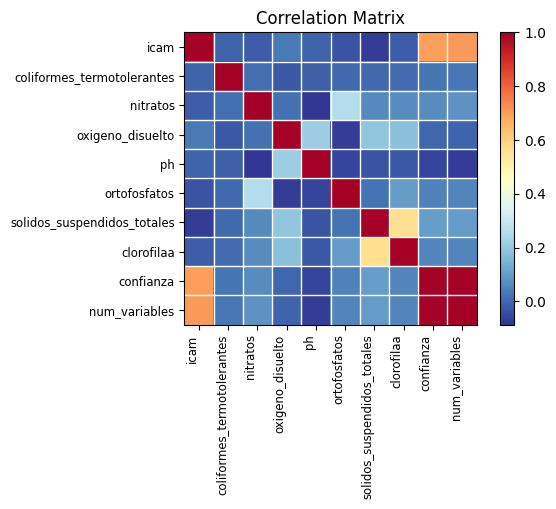

In [48]:
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.xticks(rotation=90)
plt.show()

In [88]:
icam[['nitratos', 'icam']].corr()

,nitratos,icam
nitratos,1.000000,-0.016719
icam,-0.016719,1.000000


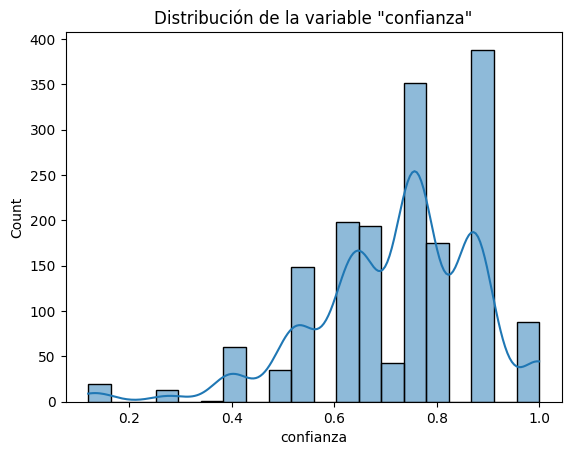

In [87]:
### Evaluacion icam vs cada contaminante
##mapa de calor


sns.histplot(data=icam, x='confianza', bins=20, kde=True)
plt.title('Distribución de la variable "confianza"')
plt.show()

In [56]:
pd.unique(icam['icam_calificacion'])        


array(['INADECUADA', 'ACEPTABLE', 'ADECUADA', 'PESIMA', 'OPTIMA',
       'NO REPORTADO'], dtype=object)

<h3> 10. ¿Mayor número de variables medidas implica mejor "confianza" en el ICAM? </h3>
10.1.Gráfica Scatter plot entre num_variables vs confianza (entre mas datos...) 
    Relación entre el número de variables medidas y la confianza

In [ ]:
## Ver si la correlación entre icam y num_variables cambia por año:
icam.groupby('año')[['icam', 'num_variables']].corr().iloc[0::2, -1]

<h3> 12. Análisis: Detección de outliers (gráficas de caja) </h3>

In [82]:
#icam['confianza'].unique()
pd.unique(icam['icam_calificacion'])

array(['INADECUADA', 'ACEPTABLE', 'ADECUADA', 'PESIMA', 'OPTIMA',
       'NO REPORTADO'], dtype=object)

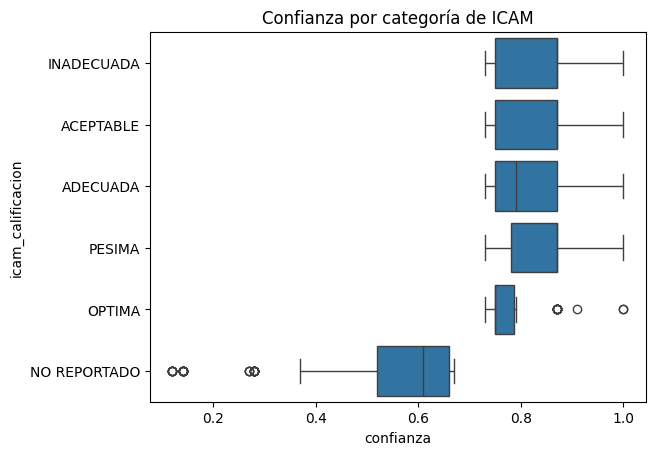

In [ ]:
## la confianza 
sns.boxplot(data=icam, x='confianza', y='icam_calificacion')
plt.title('Confianza por categoría de ICAM')

plt.show()

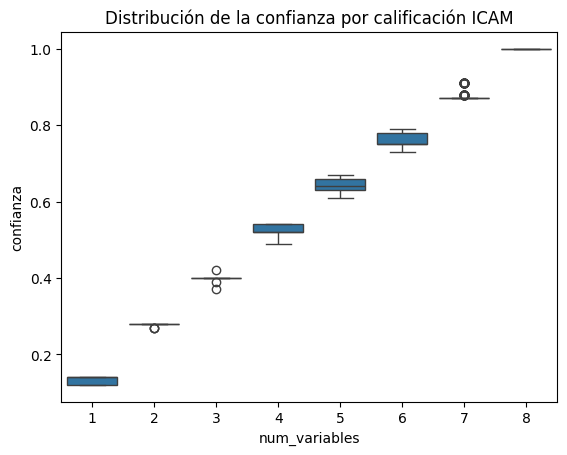

In [ ]:
## grafica de la confianza vs icam (correlacion entre confianza y num_variables)
sns.boxplot(data=icam, x ='num_variables', y ='confianza')
plt.title('Distribución de la confianza por calificación ICAM')
plt.show()

In [ ]:
## hay 20 estaciones con solo una variable medida y 88 estaciones cada una con 8 variables medidas
icam['num_variables'].value_counts().sort_index()

In [ ]:
### Cada medicion por estacion tiene una o varias muestras. Aqui podemos observar que a lo largo de los años
## se han empezado tomar muestras de mas contaminantes (variables)

sns.boxplot(data=icam, x='año', y='num_variables')
plt.title('Distribución de num_variables por año')
plt.grid(True)
plt.show()

In [ ]:
## solo en el 2023 y 2024 se hicieron muestreos con 8 variables. y solo en 2018, 2019 y 2020 se hicieron muestreos con 1 variable
icam.groupby('año')['num_variables'].agg(['min', 'max', 'mean', 'count'])

In [107]:
icam["evaluacion_coliformes_termotolerantes"].dtype

dtype('O')

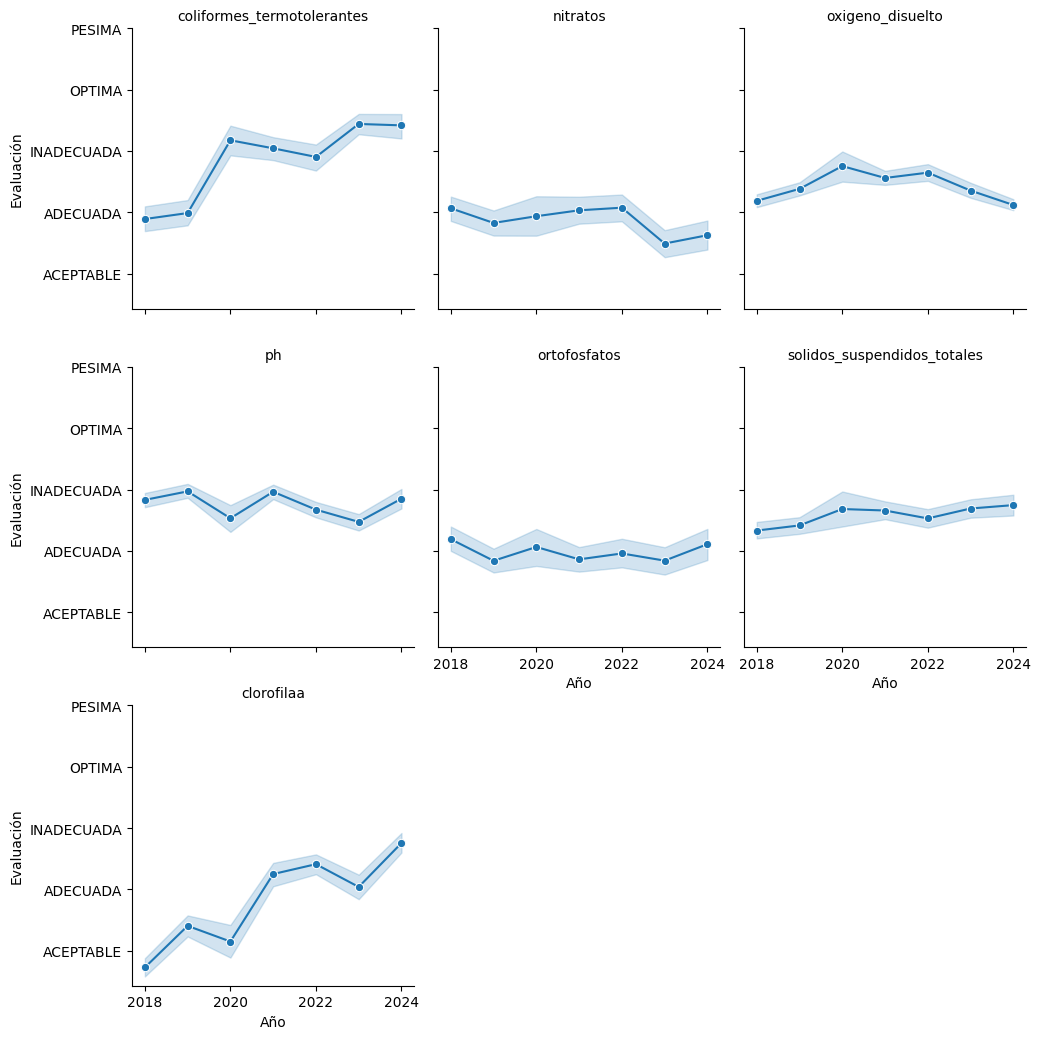

In [109]:


# Listas originales de contaminantes numéricos y evaluaciones categóricas
Contaminantes = [ 
    'coliformes_termotolerantes', 'nitratos', 'oxigeno_disuelto', 
    'ph', 'ortofosfatos','solidos_suspendidos_totales', 'clorofilaa'
]

eContaminantes = [  
    'evaluacion_coliformes_termotolerantes', 'evaluacion_nitratos',
    'evaluacion_oxigeno_disuelto', 'evaluacion_ph', 
    'evaluacion_ortofosfatos', 'evaluacion_sst',
    'evaluacion_clorofilaa'
]

# Limpiar texto y convertir a mayúsculas (en caso de que haya valores sucios)
icam[eContaminantes] = icam[eContaminantes].apply(lambda col: col.str.strip().str.upper())

# Obtener categorías únicas sin NaN (limpiar valores NaN antes de ordenar)
categorias_unicas = pd.unique(icam[eContaminantes].values.ravel())
categorias_ordenadas = sorted([c for c in categorias_unicas if pd.notna(c)])

# Convertir las columnas de evaluaciones categóricas a un tipo de dato categórico ordenado
for col in eContaminantes:
    icam[col] = pd.Categorical(icam[col], categories=categorias_ordenadas, ordered=True)

# Crear DataFrames en formato largo (long format) para valores numéricos y evaluaciones
df_valores = icam[['año'] + Contaminantes].melt(id_vars='año', var_name='contaminante', value_name='valor_contaminante')
df_eval = icam[['año'] + eContaminantes].melt(id_vars='año', var_name='evaluacion', value_name='categoria_evaluacion')

# Emparejar las evaluaciones con sus contaminantes correspondientes
df_eval['contaminante'] = df_valores['contaminante']

# Guardar los nombres de las categorías (evaluaciones)
df_eval['categoria'] = df_eval['categoria_evaluacion']  

# Convertir las categorías a números para que se pueda graficar en un gráfico de líneas
df_eval['categoria_evaluacion'] = df_eval['categoria_evaluacion'].cat.codes  # Convertir a valores numéricos

# Graficar usando lineplot
g = sns.FacetGrid(df_eval, col='contaminante', col_wrap=3, sharey=True, height=3.5)
g.map_dataframe(sns.lineplot, x='año', y='categoria_evaluacion', marker='o')

# Restaurar etiquetas en el eje Y con los nombres de las categorías
for ax in g.axes.flat:
    ax.set_yticks(range(len(categorias_ordenadas)))
    ax.set_yticklabels(categorias_ordenadas)

# Ajustes visuales
g.set_titles("{col_name}")
g.set_axis_labels("Año", "Evaluación")
plt.tight_layout()
plt.show()

<h3> Conclusiones </h3>
aunque se hicieron mas muestreosen lso primeros años, se tomaron menos variables en estos mismos años asi que la confianza fue menor: Es decir, aunque los ultimos años tienen menos muestreos, la calidad de estos muestreos es mejor.